In [1]:
import urllib.request, json
import requests
import numpy as np
import pandas as pd
import geopandas as gpd
# from itertools import chain

In [2]:
df = pd.read_csv('data.csv')
df.head()

/Users/smritimohta/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,timestamp,name_x,beacon_type,distance,hashcode,isBlocked,last_seen,manufacturer,rssi,...,longitude,accuracy(m),altitude(m),geoid_height(m),speed(m/s),bearing(deg),sat_used,sat_inview,name_y,desc
0,0,2021-09-24 19:18:47,device1,ibeacon,4.600171,-1229677222,False,1632351432738,76,-81,...,-74.012588,5,-33.543,NaN,0.87,360.0,20.0,31,NaN,NaN
1,1,2021-09-24 19:18:48,device1,ibeacon,6.358023,32202963,False,1632351432737,76,-88,...,-74.012594,5,-33.221,NaN,0.73,359.0,20.0,31,NaN,NaN
2,2,2021-09-24 19:19:16,device1,ibeacon,4.040893,144680941,False,1632511100375,76,-80,...,-74.012693,6,-32.870,NaN,0.00,NaN,21.0,31,NaN,NaN
3,3,2021-09-24 19:19:23,device1,ibeacon,8.462784,144680941,False,1632511125686,76,-90,...,-74.012701,6,-32.694,NaN,0.00,NaN,21.0,31,NaN,NaN
4,4,2021-09-24 19:19:25,device1,ibeacon,7.056213,144680941,False,1632511127891,76,-85,...,-74.012702,6,-32.653,NaN,0.00,NaN,21.0,31,NaN,NaN


In [6]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'name_x', 'beacon_type', 'distance',
       'hashcode', 'isBlocked', 'last_seen', 'manufacturer', 'rssi',
       'tx_power', 'eddystoneUidData', 'major', 'minor', 'uuid', 'type',
       'date time', 'latitude', 'longitude', 'accuracy(m)', 'altitude(m)',
       'geoid_height(m)', 'speed(m/s)', 'bearing(deg)', 'sat_used',
       'sat_inview', 'name_y', 'desc'],
      dtype='object')

In [13]:
df['instance_id'] = df['eddystoneUidData'].str.slice(17,31)
df['namespace_id'] = df['eddystoneUidData'].str.slice(51,73)

## location insights

### taxizone heat map

In [5]:
df_loc = df[['uuid','beacon_type','latitude', 'longitude']].groupby(['uuid','latitude', 'longitude']).count().sort_values('beacon_type',ascending=False).reset_index()
df_loc

,uuid,latitude,longitude,beacon_type
0,fbdde4c1-57ed-b42f-7b9f-dd517b53f2f2,40.757363,-73.989647,84
1,2686f39c-bada-4658-854a-a62e7e5e8b8d,40.717780,-74.005982,77
2,8b03238e-cebc-465d-8fb8-90e41e0f51ba,40.681103,-73.955565,73
3,5993a94c-7d97-4df7-9abf-e493bfd5d000,40.720128,-74.003292,73
4,2686f39c-bada-4658-854a-a62e7e5e8b8d,40.715154,-74.005613,71
...,...,...,...,...
29745,6d2c2ce8-677f-45fc-94d1-d958f23bebd0,40.729464,-73.991698,1
29746,6d2c2ce8-677f-45fc-94d1-d958f23bebd0,40.729492,-73.991628,1
29747,6f9c4e8b-9914-32d3-afa9-cc7a590bebd3,40.750894,-73.983759,1
29748,71b2f817-2875-4835-a94e-f9b6c31a5a24,40.683670,-73.995222,1


In [17]:
df_loc_eddy = df[['namespace_id','beacon_type','latitude', 'longitude']].groupby(['namespace_id','latitude', 'longitude']).count().sort_values('beacon_type',ascending=False).reset_index()
df_loc_eddy = df_loc_eddy.rename(columns={'namespace_id':'uuid'})
df_loc_eddy

,uuid,latitude,longitude,beacon_type
0,0x5713793103decaf22026,40.714183,-74.008735,67
1,0x5713793103decaf22026,40.714298,-74.008672,67
2,0x5713793103decaf22026,40.714191,-74.008725,66
3,0x5713793103decaf22026,40.714207,-74.008707,66
4,0x5713793103decaf22026,40.714398,-74.008620,65
...,...,...,...,...
2163,0xb2e5fc49d46042b9893c,40.720229,-74.010281,1
2164,0xb2e5fc49d46042b9893c,40.720219,-74.010281,1
2165,0xb2e5fc49d46042b9893c,40.720143,-74.010289,1
2166,0xb2e5fc49d46042b9893c,40.720097,-74.010315,1


In [15]:
df_url = df[df['beacon_type']=='eddystone_url']
df_loc_url = df_url[['beacon_type','latitude','longitude']].groupby(['latitude', 'longitude']).count().sort_values('beacon_type',ascending=False).reset_index()
df_loc_url['uuid'] = 'eddystone_url'
df_loc_url = df_loc_url[['uuid','latitude','longitude','beacon_type']]
df_loc_url

,uuid,latitude,longitude,beacon_type
0,eddystone_url,40.752845,-73.985565,31
1,eddystone_url,40.754031,-73.974168,13
2,eddystone_url,40.759373,-73.970333,13
3,eddystone_url,40.754078,-73.974141,13
4,eddystone_url,40.751824,-73.976567,13
...,...,...,...,...
88,eddystone_url,40.760999,-73.971389,1
89,eddystone_url,40.754452,-73.988388,1
90,eddystone_url,40.754480,-73.988387,1
91,eddystone_url,40.754704,-73.989160,1


In [18]:
df_loc_merge = pd.concat([df_loc,df_loc_eddy,df_loc_url], axis=0, ignore_index=True)
df_loc_merge

,uuid,latitude,longitude,beacon_type
0,fbdde4c1-57ed-b42f-7b9f-dd517b53f2f2,40.757363,-73.989647,84
1,2686f39c-bada-4658-854a-a62e7e5e8b8d,40.717780,-74.005982,77
2,8b03238e-cebc-465d-8fb8-90e41e0f51ba,40.681103,-73.955565,73
3,5993a94c-7d97-4df7-9abf-e493bfd5d000,40.720128,-74.003292,73
4,2686f39c-bada-4658-854a-a62e7e5e8b8d,40.715154,-74.005613,71
...,...,...,...,...
32006,eddystone_url,40.760999,-73.971389,1
32007,eddystone_url,40.754452,-73.988388,1
32008,eddystone_url,40.754480,-73.988387,1
32009,eddystone_url,40.754704,-73.989160,1


In [19]:
# converting the dataframe to geo-dataframe
import geopandas as gpd
gdf_loc_gpd = gpd.GeoDataFrame(df_loc_merge, geometry=gpd.points_from_xy(df_loc_merge.longitude, df_loc_merge.latitude))
gdf_loc_gpd.head()

,uuid,latitude,longitude,beacon_type,geometry
0,fbdde4c1-57ed-b42f-7b9f-dd517b53f2f2,40.757363,-73.989647,84,POINT (-73.98965 40.75736)
1,2686f39c-bada-4658-854a-a62e7e5e8b8d,40.717780,-74.005982,77,POINT (-74.00598 40.71778)
2,8b03238e-cebc-465d-8fb8-90e41e0f51ba,40.681103,-73.955565,73,POINT (-73.95557 40.68110)
3,5993a94c-7d97-4df7-9abf-e493bfd5d000,40.720128,-74.003292,73,POINT (-74.00329 40.72013)
4,2686f39c-bada-4658-854a-a62e7e5e8b8d,40.715154,-74.005613,71,POINT (-74.00561 40.71515)


In [20]:
gdf_loc_gpd.crs = "epsg:4326"
gdf_loc_gpd.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## census tract heatmap

In [21]:
census = gpd.read_file('https://raw.githubusercontent.com/claugomzz/iot-capstone/main/Raw%20Datasets/Census%20Tract%20Shapefile/NYCcensus_exploded.json')
census.head()


,level_0,level_1,OBJECTID,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,Shape__Area,Shape__Length,census_id,geometry
0,0,0,1,1,1,Manhattan,000100,1000100,None,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000100,1.844391e+06,11022.881944,0,"POLYGON ((-74.04388 40.69020, -74.04351 40.689..."
1,0,1,1,1,1,Manhattan,000100,1000100,None,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000100,1.844391e+06,11022.881944,1,"POLYGON ((-74.03995 40.70090, -74.03945 40.700..."
2,1,0,2,2.01,1,Manhattan,000201,1000201,None,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000201,9.723121e+05,4754.494868,2,"POLYGON ((-73.98450 40.70952, -73.98655 40.709..."
3,2,0,3,2.02,1,Manhattan,000202,1000202,None,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000202,3.315114e+06,8568.089568,3,"POLYGON ((-73.98364 40.70960, -73.98450 40.709..."
4,2,1,3,2.02,1,Manhattan,000202,1000202,None,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000202,3.315114e+06,8568.089568,4,"POLYGON ((-73.98237 40.70555, -73.98246 40.705..."


In [22]:
census.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [24]:
# performing a spatial join on city locations within US counties
gdf_census = gpd.sjoin(gdf_loc_gpd,census,op="within", how="right")
gdf_census.tail()

,index_left,uuid,latitude,longitude,beacon_type,level_0,level_1,OBJECTID,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,Shape__Area,Shape__Length,census_id,geometry
2463,NaN,NaN,NaN,NaN,NaN,2321,0,2322,319.01,5,Staten Island,031901,5031901,None,Mariner's Harbor-Arlington-Graniteville,SI0107,SI01,SI01 North Shore (CD 1 Equivalent),36085031901,4.126613e+06,8255.013622,2463,"POLYGON ((-74.16050 40.62654, -74.16118 40.626..."
2464,NaN,NaN,NaN,NaN,NaN,2322,0,2323,319.02,5,Staten Island,031902,5031902,None,Mariner's Harbor-Arlington-Graniteville,SI0107,SI01,SI01 North Shore (CD 1 Equivalent),36085031902,7.005078e+06,16958.325307,2464,"POLYGON ((-74.16035 40.63845, -74.16024 40.638..."
2465,NaN,NaN,NaN,NaN,NaN,2323,0,2324,323,5,Staten Island,032300,5032300,None,Mariner's Harbor-Arlington-Graniteville,SI0107,SI01,SI01 North Shore (CD 1 Equivalent),36085032300,4.162499e+07,38242.743701,2465,"POLYGON ((-74.17119 40.64175, -74.17129 40.640..."
2466,NaN,NaN,NaN,NaN,NaN,2324,0,2325,9901,5,Staten Island,990100,5990100,None,Hoffman & Swinburne Islands,SI9591,SI95,SI95 Great Kills Park-Fort Wadsworth (JIA 95 A...,36085990100,6.357020e+05,4743.128085,2466,"POLYGON ((-74.05314 40.57771, -74.05406 40.577..."
2467,NaN,NaN,NaN,NaN,NaN,2324,1,2325,9901,5,Staten Island,990100,5990100,None,Hoffman & Swinburne Islands,SI9591,SI95,SI95 Great Kills Park-Fort Wadsworth (JIA 95 A...,36085990100,6.357020e+05,4743.128085,2467,"POLYGON ((-74.05051 40.56643, -74.05047 40.566..."


In [26]:
gdf_census.shape

(34349, 23)

In [57]:
gdf_census_borough = gdf_census[(gdf_census["BoroName"]=="Manhattan")|(gdf_census["BoroName"]=="Brooklyn")]

In [59]:
gdf_census_borough = gdf_census_borough[['beacon_type','census_id']].groupby(by=['census_id']).sum().reset_index()
gdf_census_borough

,census_id,beacon_type
0,0,0.0
1,1,0.0
2,2,0.0
3,3,45.0
4,4,0.0
...,...,...
1179,1572,0.0
1180,1573,0.0
1181,1574,0.0
1182,1575,0.0


In [60]:
gdf_census_borough = gdf_census_borough.merge(census, on='census_id')
gdf_census_borough

,census_id,beacon_type,level_0,level_1,OBJECTID,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,Shape__Area,Shape__Length,geometry
0,0,0.0,0,0,1,1,1,Manhattan,000100,1000100,None,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000100,1.844391e+06,11022.881944,"POLYGON ((-74.04388 40.69020, -74.04351 40.689..."
1,1,0.0,0,1,1,1,1,Manhattan,000100,1000100,None,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000100,1.844391e+06,11022.881944,"POLYGON ((-74.03995 40.70090, -74.03945 40.700..."
2,2,0.0,1,0,2,2.01,1,Manhattan,000201,1000201,None,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000201,9.723121e+05,4754.494868,"POLYGON ((-73.98450 40.70952, -73.98655 40.709..."
3,3,45.0,2,0,3,2.02,1,Manhattan,000202,1000202,None,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000202,3.315114e+06,8568.089568,"POLYGON ((-73.98364 40.70960, -73.98450 40.709..."
4,4,0.0,2,1,3,2.02,1,Manhattan,000202,1000202,None,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000202,3.315114e+06,8568.089568,"POLYGON ((-73.98237 40.70555, -73.98246 40.705..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,1572,0.0,1470,0,1471,1214,3,Brooklyn,121400,3121400,None,East New York-City Line,BK0505,BK05,BK05 East New York-Cypress Hills (CD 5 Approxi...,36047121400,1.864054e+06,5508.179631,"POLYGON ((-73.86833 40.66874, -73.86777 40.668..."
1180,1573,0.0,1471,0,1472,1220,3,Brooklyn,122000,3122000,None,East New York-City Line,BK0505,BK05,BK05 East New York-Cypress Hills (CD 5 Approxi...,36047122000,1.148721e+07,20115.056990,"POLYGON ((-73.86270 40.65763, -73.86300 40.657..."
1181,1574,0.0,1472,0,1473,1237,3,Brooklyn,123700,3123700,None,Bedford-Stuyvesant (West),BK0301,BK03,BK03 Bedford-Stuyvesant (CD 3 Approximation),36047123700,3.459462e+06,7492.844751,"POLYGON ((-73.95249 40.69501, -73.95342 40.694..."
1182,1575,0.0,1473,0,1474,1502,3,Brooklyn,150200,3150200,None,Windsor Terrace-South Slope,BK0701,BK07,BK07 Sunset Park-Windsor Terrace (CD 7 Approxi...,36047150200,3.430774e+06,11199.430439,"POLYGON ((-73.98725 40.66039, -73.98713 40.660..."


In [62]:
gdf_census_borough = gpd.GeoDataFrame(gdf_census_borough)

In [63]:
gdf_census_borough.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [64]:
# gdf_census_borough = gdf_census_borough[gdf_census_borough['beacon_type']>0]
gdf_census_borough = gdf_census_borough.sort_values(by='beacon_type',ascending=False)
gdf_census_borough

,census_id,beacon_type,level_0,level_1,OBJECTID,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,Shape__Area,Shape__Length,geometry
34,34,49254.0,19,0,20,21,1,Manhattan,002100,1002100,None,Tribeca-Civic Center,MN0102,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061002100,2.560061e+06,6740.332162,"POLYGON ((-74.00921 40.71620, -74.00882 40.716..."
55,55,42041.0,34,0,35,33,1,Manhattan,003300,1003300,None,Tribeca-Civic Center,MN0102,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061003300,3.677728e+06,8170.756287,"POLYGON ((-74.00531 40.72183, -74.00523 40.721..."
147,147,29165.0,120,0,121,113,1,Manhattan,011300,1011300,None,Midtown-Times Square,MN0502,MN05,MN05 Midtown-Flatiron-Union Square (CD 5 Appro...,36061011300,1.890907e+06,5699.860640,"POLYGON ((-73.98412 40.75485, -73.98460 40.754..."
141,141,21865.0,114,0,115,109,1,Manhattan,010900,1010900,None,Midtown-Times Square,MN0502,MN05,MN05 Midtown-Flatiron-Union Square (CD 5 Appro...,36061010900,1.891365e+06,5703.531276,"POLYGON ((-73.98595 40.75233, -73.98640 40.751..."
109,109,19278.0,85,0,86,84,1,Manhattan,008400,1008400,None,Midtown-Times Square,MN0502,MN05,MN05 Midtown-Flatiron-Union Square (CD 5 Appro...,36061008400,1.862742e+06,5690.701889,"POLYGON ((-73.98089 40.75349, -73.98094 40.753..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,852,0.0,781,0,782,134,3,Brooklyn,013400,3013400,None,Bay Ridge,BK1001,BK10,BK10 Bay Ridge-Dyker Heights (CD 10 Approximat...,36047013400,2.887190e+06,8713.651641,"POLYGON ((-74.01605 40.63104, -74.01634 40.630..."
461,854,0.0,783,0,784,136,3,Brooklyn,013600,3013600,None,Bay Ridge,BK1001,BK10,BK10 Bay Ridge-Dyker Heights (CD 10 Approximat...,36047013600,2.312743e+06,8226.979953,"POLYGON ((-74.01784 40.62660, -74.01886 40.624..."
463,856,0.0,785,0,786,138,3,Brooklyn,013800,3013800,None,Bay Ridge,BK1001,BK10,BK10 Bay Ridge-Dyker Heights (CD 10 Approximat...,36047013800,1.749765e+06,6620.928784,"POLYGON ((-74.02180 40.62436, -74.02209 40.623..."
464,857,0.0,786,0,787,139,3,Brooklyn,013900,3013900,None,Park Slope,BK0602,BK06,BK06 Park Slope-Carroll Gardens (CD 6 Approxim...,36047013900,1.631336e+06,5219.680226,"POLYGON ((-73.98394 40.66804, -73.98444 40.667..."


In [86]:
gdf_census_borough['beacon_type'] = gdf_census_borough['beacon_type'].replace(0, np.nan)

In [87]:
gdf_census_borough

,census_id,beacon_type,level_0,level_1,OBJECTID,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,Shape__Area,Shape__Length,geometry
34,34,49254.0,19,0,20,21,1,Manhattan,002100,1002100,None,Tribeca-Civic Center,MN0102,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061002100,2.560061e+06,6740.332162,"POLYGON ((-74.00921 40.71620, -74.00882 40.716..."
55,55,42041.0,34,0,35,33,1,Manhattan,003300,1003300,None,Tribeca-Civic Center,MN0102,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061003300,3.677728e+06,8170.756287,"POLYGON ((-74.00531 40.72183, -74.00523 40.721..."
147,147,29165.0,120,0,121,113,1,Manhattan,011300,1011300,None,Midtown-Times Square,MN0502,MN05,MN05 Midtown-Flatiron-Union Square (CD 5 Appro...,36061011300,1.890907e+06,5699.860640,"POLYGON ((-73.98412 40.75485, -73.98460 40.754..."
141,141,21865.0,114,0,115,109,1,Manhattan,010900,1010900,None,Midtown-Times Square,MN0502,MN05,MN05 Midtown-Flatiron-Union Square (CD 5 Appro...,36061010900,1.891365e+06,5703.531276,"POLYGON ((-73.98595 40.75233, -73.98640 40.751..."
109,109,19278.0,85,0,86,84,1,Manhattan,008400,1008400,None,Midtown-Times Square,MN0502,MN05,MN05 Midtown-Flatiron-Union Square (CD 5 Appro...,36061008400,1.862742e+06,5690.701889,"POLYGON ((-73.98089 40.75349, -73.98094 40.753..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,852,NaN,781,0,782,134,3,Brooklyn,013400,3013400,None,Bay Ridge,BK1001,BK10,BK10 Bay Ridge-Dyker Heights (CD 10 Approximat...,36047013400,2.887190e+06,8713.651641,"POLYGON ((-74.01605 40.63104, -74.01634 40.630..."
461,854,NaN,783,0,784,136,3,Brooklyn,013600,3013600,None,Bay Ridge,BK1001,BK10,BK10 Bay Ridge-Dyker Heights (CD 10 Approximat...,36047013600,2.312743e+06,8226.979953,"POLYGON ((-74.01784 40.62660, -74.01886 40.624..."
463,856,NaN,785,0,786,138,3,Brooklyn,013800,3013800,None,Bay Ridge,BK1001,BK10,BK10 Bay Ridge-Dyker Heights (CD 10 Approximat...,36047013800,1.749765e+06,6620.928784,"POLYGON ((-74.02180 40.62436, -74.02209 40.623..."
464,857,NaN,786,0,787,139,3,Brooklyn,013900,3013900,None,Park Slope,BK0602,BK06,BK06 Park Slope-Carroll Gardens (CD 6 Approxim...,36047013900,1.631336e+06,5219.680226,"POLYGON ((-73.98394 40.66804, -73.98444 40.667..."


Text(0.5, 1.0, 'Overall Beacon Signals Distribution')

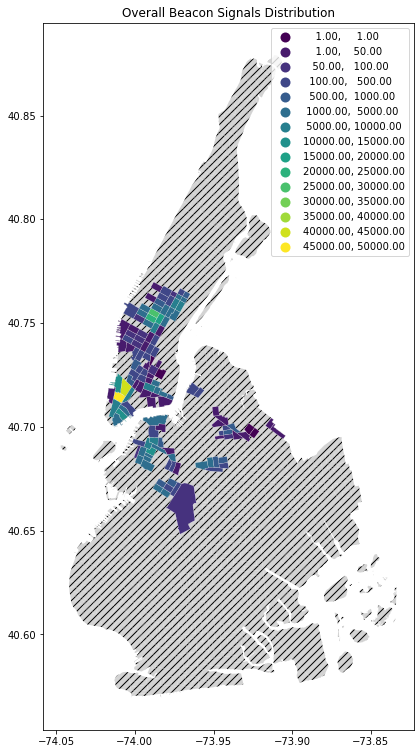

In [89]:
fig, ax = plt.subplots(1, figsize=(13,13))

gdf_census_borough.plot(facecolor='lightgrey',hatch='///',ax=ax)

gdf_census_borough.plot(ax=ax, column='beacon_type', k=10, scheme="User_Defined",
         legend=True, edgecolor='white', linewidth=0.2, 
        classification_kwds=dict(bins=[1,50,100,500,1000,5000,10000,15000,20000,25000,30000,35000,40000,45000,50000]), 
        legend_kwds={'loc': 'upper right'})
ax.set_title('Overall Beacon Signals Distribution')